In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
#Observed data
x_obs = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]
y_obs = [0.328572824089476, 4.20607004111644, 1.35507551134795,
0.161608755204364, -5.42320349780782, -3.05851276224202, -0.0764172642034502,
-4.55218472276499, -0.902226297922731, -5.8609833528976, -1.05854090910473]

In [3]:
x_predict = np.linspace(-11,11,551,endpoint=True)
observed_idx = [26, 76, 126, 176, 226, 276, 326, 376, 426, 476, 526]

In [4]:
alpha = 3
rho = 5.5
sigma = 2

In [6]:
model = CmdStanModel(stan_file=r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\lab6\gaussian_process.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\lab6\gaussian_process.stan to exe file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\lab6\gaussian_process.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\lab6\gaussian_process.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Jaskier-PC/Desktop/semestr8/Data_analysis/lab6/gaussian_process.hpp C:/Users/Jaskier-PC/Desktop/semestr8/Data_analysis/lab6/gaussian_process.stan
Warning in 'C:/Users/Jaskier-PC/Desktop/semestr8/Data_analysis/lab6/gaussian_process.stan', line 3, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Jaskier-PC/Desktop/semestr8/Data_analysis/lab6/gaussian_process.stan', line 6, colum

In [7]:
data = {'N_predict' : len(x_predict), 'x_predict' : x_predict, 'N_obs' : len(y_obs) ,'y_obs' : y_obs, 'observed_idx' : observed_idx, 'rho' : rho, 'alpha' : alpha, 'sigma' : sigma}
result = model.sample(data=data, chains = 4)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:02 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |███▋      | 00:02 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:02 Iteration:  700 / 2000 [ 35%]  (Warmup)




chain 1 |████▌     | 00:02 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:03 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:03 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▎   | 00:04 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████▊   | 00:04 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |███████▎  | 00:05 Iteration: 1300 / 2000 [ 


INFO:cmdstanpy:CmdStan done processing.


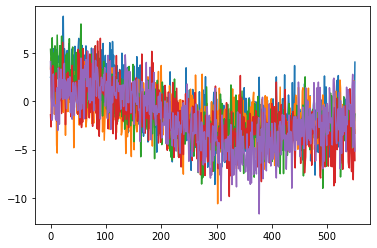

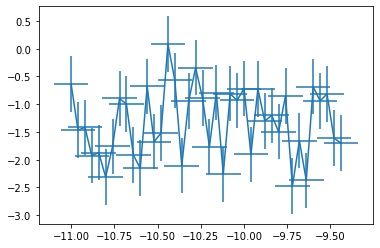

In [8]:
y = result.stan_variable('y_predict')
for i in range(0,5):
    plt.plot(y[i])
plt.show()


mean_matrix = []
for i in y:
    mean_matrix.append(np.mean(i))


plt.errorbar(x_predict[:40],mean_matrix[:40],0.5,0.1)
plt.show()

task 2

In [9]:
model2 = CmdStanModel(stan_file=r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\lab6\gaussian_process_optimize.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\lab6\gaussian_process_optimize.stan to exe file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\lab6\gaussian_process_optimize.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\lab6\gaussian_process_optimize.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Jaskier-PC/Desktop/semestr8/Data_analysis/lab6/gaussian_process_optimize.hpp C:/Users/Jaskier-PC/Desktop/semestr8/Data_analysis/lab6/gaussian_process_optimize.stan
Warning in 'C:/Users/Jaskier-PC/Desktop/semestr8/Data_analysis/lab6/gaussian_process_optimize.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Jaskier-PC/Desktop/semestr8/Da

In [10]:
data = {'N_obs' : len(y_obs), 'x_obs' : x_obs, 'y_obs' : y_obs}

In [11]:
result2 = model2.optimize(data=data, seed=5838298)

INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status



chain 1 |▉         | 00:02 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:04 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:05 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:07 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:08 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:10 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:11 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:13 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:14 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:16 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:18 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:20 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:22 Iteration: 1200 / 2000 [ 60


INFO:cmdstanpy:CmdStan done processing.


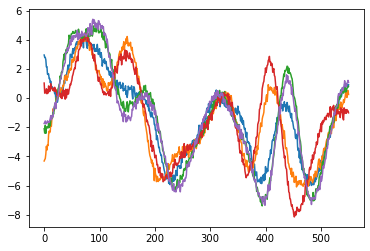

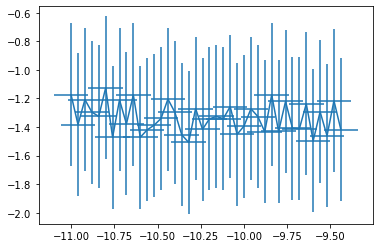

In [12]:
rho = result2.stan_variable('rho')
alpha = result2.stan_variable('alpha')
sigma = result2.stan_variable('sigma')

optimize_data = {'N_predict' : len(x_predict), 'x_predict' : x_predict, 'N_obs' : len(y_obs) ,'y_obs' : y_obs, 'observed_idx' : observed_idx, 'rho' : rho, 'alpha' : alpha, 'sigma' : sigma}

result = model.sample(data=optimize_data, chains = 4)
y = result.stan_variable('y_predict')
for i in range(0,5):
    plt.plot(y[i])
plt.show()


mean_matrix = []
for i in y:
    mean_matrix.append(np.mean(i))


plt.errorbar(x_predict[:40],mean_matrix[:40],0.5,0.1)
plt.show()